# Sobre que trata el dataset

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

In [1]:
import pandas as pd
from pycaret.nlp import *
from pycaret.utils import enable_colab
import spacy
import nltk
from nltk.corpus import stopwords

In [2]:
spacy.load('en_core_web_sm')

In [3]:
reviews = pd.read_csv('Reviews.csv')

In [4]:
reviews.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [5]:
reviews.shape

(568454, 10)

In [6]:
custom_stopwords = stopwords.words('english') + [
    'br', 
    'use', 
    'product', 
    'buy', 
    'make', 
    'food', 
    'try', 
    'find', 
    'good', 
    'great', 
    'get', 
    'taste', 
    'flavor', 
    'love', 
    'well', 
    'go', 
    'would', 
    'really',
    'eat',
    'much',
    'time',
    'even',
    'also',
]

In [7]:
reviews = reviews.sample(2000, random_state=786).reset_index(drop=True)
reviews.shape

(2000, 10)

In [8]:
exp_nlp101 = setup(data = reviews, target = 'Text', session_id = 123, custom_stopwords = custom_stopwords)

Description,Value
session_id,123
Documents,2000
Vocab Size,5823
Custom Stopwords,True


In [9]:
text_list = list(reviews['Text'])
type(text_list)

list

In [10]:
exp_nlp101_list = setup(data = text_list, session_id = 123, custom_stopwords = custom_stopwords)

Description,Value
session_id,123
Documents,2000
Vocab Size,5823
Custom Stopwords,True


In [11]:
lda = create_model('lda')

In [12]:
print(lda)

LdaModel(num_terms=5823, num_topics=4, decay=0.5, chunksize=100)


In [13]:
lda2 = create_model('lda', num_topics = 5, multi_core = True)

In [14]:
print(lda2)

LdaModel(num_terms=5823, num_topics=5, decay=0.5, chunksize=100)


### Se muestra el resultado del modelo en donde se puede ver por cada uno de los comentarios como eligió el modelo a cual tópico perteneces y con que grado de similitud.

In [15]:
lda_results = assign_model(lda)
lda_results.head()

,en,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,lunch chocolatly sweet packaging mail keep cold,0.179534,0.184773,0.517116,0.118576,Topic 2,0.52
1,reasonably_price ship fast worry free fact com...,0.179082,0.028526,0.620368,0.172024,Topic 2,0.62
2,always drink favorite mix sprite day mind larg...,0.291439,0.135823,0.444166,0.128571,Topic 2,0.44
3,hear compliment organic valley milk carton kid...,0.204897,0.429795,0.255531,0.109777,Topic 1,0.43
4,add smoky heat fact keep little shake jar righ...,0.050353,0.032394,0.866019,0.051233,Topic 2,0.87


In [16]:
lda2_results = assign_model(lda2)
lda2_results.head()

,en,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_Topic,Perc_Dominant_Topic
0,lunch chocolatly sweet packaging mail keep cold,0.025588,0.576850,0.346734,0.025512,0.025315,Topic 1,0.58
1,reasonably_price ship fast worry free fact com...,0.004588,0.004507,0.004586,0.004527,0.981793,Topic 4,0.98
2,always drink favorite mix sprite day mind larg...,0.181428,0.018513,0.763058,0.018444,0.018557,Topic 2,0.76
3,hear compliment organic valley milk carton kid...,0.009769,0.866936,0.103877,0.009719,0.009699,Topic 1,0.87
4,add smoky heat fact keep little shake jar righ...,0.004541,0.004500,0.981906,0.004532,0.004521,Topic 2,0.98


In [17]:
plot_model()

In [18]:
plot_model(plot = 'bigram')

In [19]:
plot_model(lda2, plot = 'frequency', topic_num = 'Topic 2')

In [20]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 3')

In [21]:
plot_model(lda2, plot = 'topic_distribution')

In [22]:
plot_model(lda, plot = 'topic_distribution')

In [28]:
plot_model(lda, plot = 'tsne')

In [29]:
plot_model(lda2, plot = 'tsne')

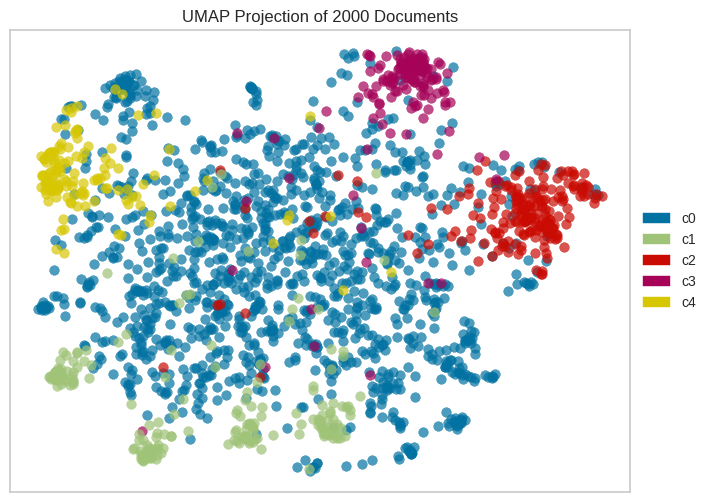

In [31]:
plot_model(lda, plot = 'umap')

In [26]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [27]:
evaluate_model(lda2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

# Primer prueba con 4 topics

**Topic 0:** Se genera un grupo con reviews en los que, sin importar el producto que se describa, las opiniones, son parecidas y se utilizan las mismas palabras.

**Topic 1:** Se genera un grupo con opiniones de productos que están relacionados con los tes

**Topic 2:** Se genera un grupo con opiniones de productos que están relacionados alimento para animales. Principalmente gatos y perros.

**Topic 3:** Se genera un grupo con opiniones de productos que están relacionados con el café


## LDA

### 4 Topicos
Un topico de gatos

Un topico de perros 

Un topico de cafe

Un topico de te

### 5 Topicos
Un topico de alimentos basicos como arroz, aceite, sal, fideos

Un topico de perros y gatos

Un topico de cafe

Un topico de te

Un topico de chocolate

### 6 Topicos
Un topico de alimentos basicos como arroz, aceite, sal, fideos

Un topico de perros y gatos

Un topico de perros

Un topico de cafe

Un topico de te

Un topico de chocolate

### Mas topicos
Con mas topicos ya nos agrupaba en distintos topicos las mismas cosas, como por ejemplo el cafe o el chocolate. Tambien empezaban a aparecer grupos que no tenian ningun sentido